In [1]:
import pandas as pd
import pickle

In [2]:
%%time
july = pd.read_pickle("../data/july.pkl")
july.head()

Wall time: 7 s


,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-07-01 00:00:33.550000,36.156678,-86.809004,Powered635135,22.0,Lyft
1,2019-07-01 00:00:34.973000,36.145674,-86.794138,Powered790946,33.0,Lyft
2,2019-07-01 00:00:41.183000,36.179319,-86.751538,Powered570380,76.0,Lyft
3,2019-07-01 00:00:41.620000,36.152111,-86.803821,Powered240631,43.0,Lyft
4,2019-07-01 00:00:45.087000,36.149355,-86.797550,Powered970404,52.0,Lyft


In [3]:
july.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25066524 entries, 0 to 25075444
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   pubdatetime  object 
 1   latitude     float64
 2   longitude    float64
 3   sumdid       object 
 4   chargelevel  float64
 5   companyname  object 
dtypes: float64(3), object(3)
memory usage: 1.3+ GB


In [4]:
july.isnull().sum()##CHARGE LEVEL COLUMN HAS 202 NULLS

pubdatetime      0
latitude         0
longitude        0
sumdid           0
chargelevel    202
companyname      0
dtype: int64

In [5]:
july.companyname.unique()

array(['Lyft', 'Bird', 'Spin', 'Bolt', 'Jump', 'Lime', 'Gotcha'],
      dtype=object)

In [6]:
july.pubdatetime = pd.to_datetime(july.pubdatetime)
july.head(2)


,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-07-01 00:00:33.550,36.156678,-86.809004,Powered635135,22.0,Lyft
1,2019-07-01 00:00:34.973,36.145674,-86.794138,Powered790946,33.0,Lyft


In [11]:
july.sumdid.nunique() ##count the number of unique sumdid

6787

In [13]:
july_group=july.groupby(['companyname'])['sumdid'].nunique()
july_group

companyname
Bird      2583
Bolt       276
Gotcha     224
Jump      1206
Lime       902
Lyft      1026
Spin       570
Name: sumdid, dtype: int64

In [14]:
july_group=july_group.sort_values()
july_group

companyname
Gotcha     224
Bolt       276
Spin       570
Lime       902
Lyft      1026
Jump      1206
Bird      2583
Name: sumdid, dtype: int64

<AxesSubplot:title={'center':'Scooters by Company, July 2019'}, xlabel='companyname'>

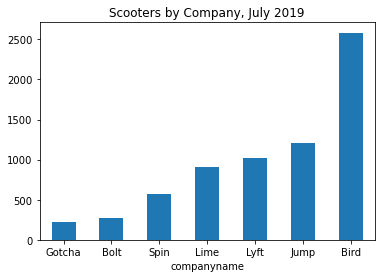

In [15]:
import matplotlib.pyplot as plt
july_group.plot.bar(x='companyname', y='sumdid', rot=0, title = 'Scooters by Company, July 2019')
##plt.show()

In [18]:
july_dead=july.loc[(july['chargelevel'] == 0.00)]
july_dead

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
1301,2019-07-01 00:04:23.687,36.160017,-86.778196,Powered1676330,0.0,Spin
1351,2019-07-01 00:04:23.687,36.011020,-86.684150,Powered4102727,0.0,Spin
1364,2019-07-01 00:04:23.687,36.011000,-86.683970,Powered8566138,0.0,Spin
1397,2019-07-01 00:04:23.687,36.147720,-86.740120,Powered1573562,0.0,Spin
1424,2019-07-01 00:04:23.687,36.011120,-86.684000,Powered8106751,0.0,Spin
...,...,...,...,...,...,...
25075287,2019-07-31 23:59:43.000,36.118800,-86.753500,Powereda72e8013-eaa2-54d5-a32d-0ea9066c7efe,0.0,Jump
25075290,2019-07-31 23:59:43.000,36.120000,-86.753100,Powereda52c64e6-2cad-5e1a-8f91-5882e2475466,0.0,Jump
25075291,2019-07-31 23:59:43.000,36.170700,-86.764300,Powered03eccca0-c690-5617-b967-1800fa512536,0.0,Jump
25075293,2019-07-31 23:59:43.000,36.213500,-86.763100,Powered96ff8edf-3972-5340-859c-cd0969a747de,0.0,Jump


In [27]:
july_dead=july.loc[(july['chargelevel'] == 0.00)]['sumdid'].nunique()
july_dead

1252

In [29]:
july_dead.groupby(['companyname'])##THE NUMBER OF COMPANIES WITH DEAD SCOOTERS


AttributeError: 'int' object has no attribute 'groupby'

In [24]:
july_dead_company =july_dead.value_counts(['companyname']).['sumdid'].nunique()##NUMBER OF DEAD SCOOTERS BY COMPANY
july_dead_company 

SyntaxError: invalid syntax (Temp/ipykernel_8272/1850803481.py, line 1)

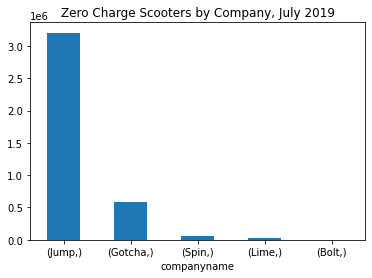

In [21]:
import matplotlib.pyplot as plt
july_dead_company.plot.bar(x='companyname', y='sumdid', rot=0, title = 'Zero Charge Scooters by Company, July 2019')
plt.show()
